# Final Lab 

### Acknowledgement of Dataset
Heart Disease UCI https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Acknowledgements Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


### Features:

* age
* sex
* cp: chest pain type (4 values)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: resting electrocardiographic results (values 0 = normal, 1, 2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (values 1 = upsloping, 2 = flat, 3 = downsloping)
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

In [56]:
# For this lab, you need to import pandas, NumPy, Matplotlib and Seaborn.

# You also need to import the following from sklearn: 
#   metrics and svm; 
#   GaussianNB from naive_bayes; 
#   confusion_matrix, plot_confusion_matrix, classification_report from metrics
#   LogisticRegression from linear_model
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, classification_report, precision_score)
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
# Read in the dataset heart.csv using pandas

df = pd.read_csv('heart.csv');

In [3]:
# Read first 5 rows of the dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145,233.0,1,0,150,0.0,2.3,0,0.0,1,1.0
1,37,1,2.0,130,250.0,0,1,187,0.0,3.5,0,0.0,2,1.0
2,41,0,1.0,130,204.0,0,0,172,0.0,1.4,2,0.0,2,1.0
3,56,1,1.0,120,236.0,0,1,178,0.0,0.8,2,0.0,2,1.0
4,57,0,0.0,120,354.0,0,1,163,1.0,0.6,2,0.0,2,1.0


In [8]:
# Rename the columns for better readability 

columns_names = {'cp':'chest_pain_type','trestbps':'resting_blood_pressure', 'exang':'exercise_ang', 'chol': 'serum_cholesterol','fbs': 'fasting_blood_sugar', 'thal': 'max_heart_rate',}

# Hint: Use pandas rename() method and input columns_names to it
df = df.rename(columns=columns_names)
df

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate,target
0,63,1,3.0,145,233.0,1,0,150,0.0,2.3,0,0.0,1,1.0
1,37,1,2.0,130,250.0,0,1,187,0.0,3.5,0,0.0,2,1.0
2,41,0,1.0,130,204.0,0,0,172,0.0,1.4,2,0.0,2,1.0
3,56,1,1.0,120,236.0,0,1,178,0.0,0.8,2,0.0,2,1.0
4,57,0,0.0,120,354.0,0,1,163,1.0,0.6,2,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0.0,140,241.0,0,1,123,1.0,0.2,1,0.0,3,0.0
299,45,1,3.0,110,264.0,0,1,132,0.0,1.2,1,0.0,3,0.0
300,68,1,0.0,144,193.0,1,1,141,0.0,3.4,1,2.0,3,0.0
301,57,1,0.0,130,131.0,0,1,115,1.0,1.2,1,1.0,3,0.0


In [9]:
# Display the datatypes for all the features 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest_pain_type         302 non-null    float64
 3   resting_blood_pressure  303 non-null    int64  
 4   serum_cholesterol       302 non-null    float64
 5   fasting_blood_sugar     303 non-null    int64  
 6   restecg                 303 non-null    int64  
 7   thalach                 303 non-null    int64  
 8   exercise_ang            300 non-null    float64
 9   oldpeak                 303 non-null    float64
 10  slope                   303 non-null    int64  
 11  ca                      302 non-null    float64
 12  max_heart_rate          303 non-null    int64  
 13  target                  302 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 35.5

You should see in the output that the target column is a float with values 0.0 and 1.0. You will convert it to integer.

In [16]:
# Check for NaN values

df.isna().any()

age                       False
sex                       False
chest_pain_type            True
resting_blood_pressure    False
serum_cholesterol          True
fasting_blood_sugar       False
restecg                   False
thalach                   False
exercise_ang               True
oldpeak                   False
slope                     False
ca                         True
max_heart_rate            False
target                     True
dtype: bool

In [17]:
# Check the number of missing values per feature

df.isna().sum()

age                       0
sex                       0
chest_pain_type           1
resting_blood_pressure    0
serum_cholesterol         1
fasting_blood_sugar       0
restecg                   0
thalach                   0
exercise_ang              3
oldpeak                   0
slope                     0
ca                        1
max_heart_rate            0
target                    1
dtype: int64

In [20]:
# Print rows having NaN values

# This is a good step to analyze missing fields and decide the best approach to deal with them.
df[df.isna().sum(axis=1) > 0]

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate,target
5,57,1,NaN,140,NaN,0,1,148,NaN,0.4,1,NaN,1,NaN
11,48,0,2.0,130,275.0,0,1,139,NaN,0.2,2,0.0,2,1.0
20,59,1,0.0,135,234.0,0,1,161,NaN,0.5,1,0.0,3,1.0


The output of the above command should display three rows. (Rows 5, 11, and 20)

Row 5 has five NaN entries, including the target, this row does not give good representation of the data, thus you will remove it. However, rows 11 and 20 are only missing one entry each; You will replace the NaN entry in the exercise_ang column by the mean of exercise_ang.

In [27]:
# Compute the mean of exercise_ang column

mean_exercise_ang = df['exercise_ang'].mean()
mean_exercise_ang

0.33

In [24]:
# Replace NaN entries in the column 'exercise_ang' by its mean
# Hint: use fillna() method

df = df.fillna(value={'exercise_ang': mean_exercise_ang})

In [25]:
# Use the head method to confirm the new entries in rows 11 and 20

df.head(21)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate,target
0,63,1,3.0,145,233.0,1,0,150,0.00,2.3,0,0.0,1,1.0
1,37,1,2.0,130,250.0,0,1,187,0.00,3.5,0,0.0,2,1.0
2,41,0,1.0,130,204.0,0,0,172,0.00,1.4,2,0.0,2,1.0
3,56,1,1.0,120,236.0,0,1,178,0.00,0.8,2,0.0,2,1.0
4,57,0,0.0,120,354.0,0,1,163,1.00,0.6,2,0.0,2,1.0
5,57,1,NaN,140,NaN,0,1,148,0.33,0.4,1,NaN,1,NaN
6,56,0,1.0,140,294.0,0,0,153,0.00,1.3,1,0.0,2,1.0
7,44,1,1.0,120,263.0,0,1,173,0.00,0.0,2,0.0,3,1.0
8,52,1,2.0,172,199.0,1,1,162,0.00,0.5,2,0.0,3,1.0
9,57,1,2.0,150,168.0,0,1,174,0.00,1.6,2,0.0,2,1.0


In [28]:
# Remove the rest of the NaN values (row 5)
# Hint: use dropna() method

df = df.dropna()

In [29]:
# Make sure no more NaN values (same method as used above to first check for NaN values)

df.isna().any()

age                       False
sex                       False
chest_pain_type           False
resting_blood_pressure    False
serum_cholesterol         False
fasting_blood_sugar       False
restecg                   False
thalach                   False
exercise_ang              False
oldpeak                   False
slope                     False
ca                        False
max_heart_rate            False
target                    False
dtype: bool

Now that the dataset has been cleaned, change the 'target' from `float` to `int.` 

In [34]:
# Change the data type of the target to int, then display several entries to confirm
# Hint: Use .loc method to locate the target column

df['target'] = df.loc[:,'target'].astype(int)

In [35]:
# View a few random rows of the dataset to confirm target is changed to int

df.sample(10)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate,target
21,44,1,2.0,130,233.0,0,1,179,1.0,0.4,2,0.0,2,1
156,47,1,2.0,130,253.0,0,1,179,0.0,0.0,2,0.0,2,1
120,64,0,0.0,130,303.0,0,1,122,0.0,2.0,1,2.0,2,1
219,48,1,0.0,130,256.0,1,0,150,1.0,0.0,2,2.0,3,0
8,52,1,2.0,172,199.0,1,1,162,0.0,0.5,2,0.0,3,1
141,43,1,0.0,115,303.0,0,1,181,0.0,1.2,1,0.0,2,1
178,43,1,0.0,120,177.0,0,0,120,1.0,2.5,1,0.0,3,0
42,45,1,0.0,104,208.0,0,0,148,1.0,3.0,1,0.0,2,1
47,47,1,2.0,138,257.0,0,0,156,0.0,0.0,2,0.0,2,1
217,63,1,0.0,130,330.0,1,0,132,1.0,1.8,2,3.0,3,0


## Visualization

Now that the dataset has been cleaned, let's visualize it, as a first step towards understanding it.

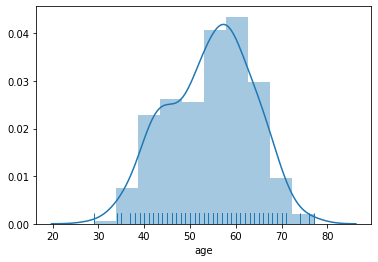

In [37]:
# Plot the distribution of age feature in the dataset using Seaborn
# Hint, use Seaborn's distplot() method and specify a number of bins

sns.distplot(a=df['age'], bins=10, hist=True, kde=True, rug=True)

The plot should show that a high percentage of the observations in this dataset are for people aged between 50 and 60, while few observations are for people under 40.

As a last step before implementing any models, you need to define the variables, and then split the data into training and test sets.

In [40]:
# Define variables: X is everything but target; y is target. 

X = df.drop(['target'], axis=1)
y = df['target']

In [42]:
# Display the first few X entries and compare to the cleaned dataset

display(X.head())
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate
0,63,1,3.0,145,233.0,1,0,150,0.0,2.3,0,0.0,1
1,37,1,2.0,130,250.0,0,1,187,0.0,3.5,0,0.0,2
2,41,0,1.0,130,204.0,0,0,172,0.0,1.4,2,0.0,2
3,56,1,1.0,120,236.0,0,1,178,0.0,0.8,2,0.0,2
4,57,0,0.0,120,354.0,0,1,163,1.0,0.6,2,0.0,2


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,thalach,exercise_ang,oldpeak,slope,ca,max_heart_rate,target
0,63,1,3.0,145,233.0,1,0,150,0.0,2.3,0,0.0,1,1
1,37,1,2.0,130,250.0,0,1,187,0.0,3.5,0,0.0,2,1
2,41,0,1.0,130,204.0,0,0,172,0.0,1.4,2,0.0,2,1
3,56,1,1.0,120,236.0,0,1,178,0.0,0.8,2,0.0,2,1
4,57,0,0.0,120,354.0,0,1,163,1.0,0.6,2,0.0,2,1


In [43]:
# Display the first few y entries and compare to the cleaned dataset 

display(y.head())
df['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [44]:
# Split data to training and test sets with split 70-30
# Use random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building Models



Now, run Logistic Regression, SVM, and Naive Bayes classifiers, as in the earlier labs. And for every model obtain the following:

- Confusion matrix 
- Accuracy score
- Classification report

### Logistic Regression

In [46]:
# Run Logistic Regression model 
logreg = LogisticRegression(solver='liblinear', max_iter=2000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test) 

[[33  9]
 [ 6 43]]


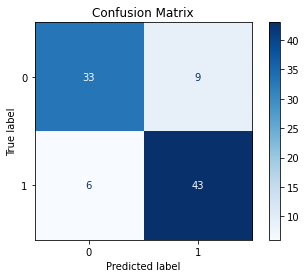

In [51]:
# Obtain and plot the confusion matrix
conf = confusion_matrix(y_test, logreg_pred)
print(conf)

disp = plot_confusion_matrix(logreg, X_test, y_test,
display_labels=["0","1"],                          
cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

Your Logistic Regression confusion matrix should show 33 correct negatives and 43 correct positives. 

In [57]:
# Compute the accuracy score; your result should be approximately 0.835
accuracy = (conf[0,0] + conf[1,1])/(conf[0,0]+conf[0,1]+conf[1,0]+conf[1,1])
print("Accuracy:", accuracy * 100, "%\n\n")
logreg_s = logreg.score(X_test, y_test)
print("Accuracy:", int(logreg_s *100), "%\n\n")

# Obtain the classification report 
w = classification_report(y_test, logreg_pred, labels=[0,1], target_names=['0','1'])
print(w)

# Obtain the precision score
ps = precision_score(y_test, logreg_pred)
print(ps)


Accuracy: 83.51648351648352 %


Accuracy: 83 %


              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.83      0.88      0.85        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

0.8269230769230769


Your Logistic Regression accuracy score should be approximately 0.835 and your precision score should be approximately 0.827.

That means our model is performing reasonably well, but we need to compare those metrics with the other model's metrics to decide which of the three models performs better on the given dataset.

The accuracy score indicates that 83.5% of the observations were correctly classified (as disease or no_disease) and the precision score indicates that 82.7% of positive predictions (that is disease) are really positive (that is they belong to patients with heart disease. 

### SVM Classifier


In [58]:
# Run SVM model and obtain the predictions
# Import svm model
from sklearn import svm

# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_model.predict(X_test)

[[34  8]
 [ 7 42]]


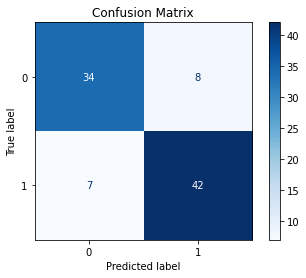

In [59]:
# Obtain and plot the confusion matrix
conf_svm = confusion_matrix(y_test, y_pred)
print(conf_svm)

disp = plot_confusion_matrix(svm_model, X_test, y_test,
display_labels=["0","1"],                          
cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

Your SVM confusion matrix should show 34 correct negatives and 42 correct positives. 

In [62]:
# Obtain the accuracy score
accuracy_svm = (conf_svm[0,0] + conf_svm[1,1])/(conf_svm[0,0]+conf_svm[0,1]+conf_svm[1,0]+conf_svm[1,1])
print("Accuracy:", accuracy_svm * 100, "%\n\n")
svm_s = svm_model.score(X_test, y_test)
print("Accuracy:", int(svm_s *100), "%\n\n")

# Obtain the classification report
w = classification_report(y_test, y_pred, labels=[0,1], target_names=['0','1'])
print(w)

# Obtain the Precision Score
ps = precision_score(y_test, y_pred)
print(ps)


Accuracy: 83.51648351648352 %


Accuracy: 83 %


              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

0.84


Your SVM accuracy score should be approximately 0.835 and your precision score should be 0.84. Those values are very close to the metric values obtained by the Logistic Regression model which means both models have the same performance.

## Naive Bayes Classifier


In [63]:
# Run the Naive Bayes algorithm 
# Create a Gaussian Classifier
gnb_model = GaussianNB()

# Train the model using the training sets
gnb_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb_model.predict(X_test)

[[36  6]
 [10 39]]


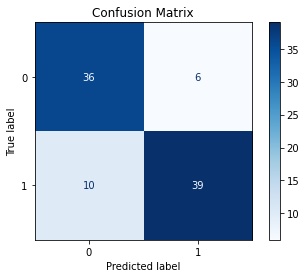

In [64]:
# Obtain and plot the confusion matrix
conf_gnb = confusion_matrix(y_test, y_pred)
print(conf_gnb)

disp = plot_confusion_matrix(gnb_model, X_test, y_test,
display_labels=["0","1"],                          
cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

Your Naive Bayes confusion matrix should show 36 correct negatives and 39 correct positives.

In [67]:
# Obtain the accuracy score
accuracy_gnb = (conf_gnb[0,0] + conf_gnb[1,1])/(conf_gnb[0,0]+conf_gnb[0,1]+conf_gnb[1,0]+conf_gnb[1,1])
print("Accuracy:", accuracy_gnb * 100, "%\n\n")
gnb_s = gnb_model.score(X_test, y_test)
print("Accuracy:", int(gnb_s *100), "%\n\n")

# Obtain the classification report
w = classification_report(y_test, y_pred, labels=[0,1], target_names=['0','1'])
print(w)

# Obtain the Precision Score
ps = precision_score(y_test, y_pred)
print(ps)


Accuracy: 82.41758241758241 %


Accuracy: 82 %


              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.87      0.80      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91

0.8666666666666667


In [77]:

# Option B

a = 10
b = 20
if b > a:
               print("b is greater than a")

b is greater than a


Your Naive Bayes accuracy score should be approximately 0.824 and your precision score should be approximately 0.867.


## LMS Upload


Once you complete the above exercise, save the code snippet to a text file and upload it to the LMS under the Uploads tab in the field name: ML Final Lab.

##        Results and Conclusion

The three models' performance on the heart.csv is very close from each other. But, the Naive Bayes has the highest precision score (86.7%).